In [100]:
import numpy as np
import pandas as pd
import os
from pathlib import Path
import tqdm
import matplotlib.pyplot as plt

%matplotlib inline

### Reading

In [88]:
def txt_to_matrix(filename, line_skip = 5):
    f = open (filename, 'r')
    
    # Lineskip, cleaning, conversion
    data = f.readlines()[line_skip:]
    
    return np.asarray(
        [l.replace("\n", "").split() for l in data]
    ).astype(np.float32)

In [89]:
def get_time_step(root, index):

    wse = txt_to_matrix(root + '/decoded--' + index + '.WSE')
    dep = txt_to_matrix(root + '/decoded--' + index + '.DEP')
    vvx = txt_to_matrix(root + '/decoded--' + index + '.VVX')
    vvy = txt_to_matrix(root + '/decoded--' + index + '.VVY')

    # timestep: matrice 801 rows x 4 misurazioni x 1256 colonne (valori)
    return np.array(list(zip(wse, dep, vvx, vvy)))

In [92]:
rootdir = '../output/'
timesteps = []

paths = [p for p in sorted(os.listdir('../output'))]
x = 0
ceiling = 50

# Read all dirs and process them
for path in tqdm.tqdm(paths):
    
    if x >= ceiling: break
    
    # Processing
    path = rootdir + path
    timesteps.append(
        get_time_step(
            path, ("{:04d}".format(x))
        )
    )
    x += 1
        
timesteps = np.asarray(timesteps).astype(np.float32)

 94%|█████████▍| 50/53 [01:36<00:05,  1.93s/it]


In [94]:
timesteps.shape

(50, 801, 4, 1256)

### Processing

<ipython-input-141-a7b2ed8ce311>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.matshow(frame, cmap="plasma")


<Figure size 432x288 with 0 Axes>

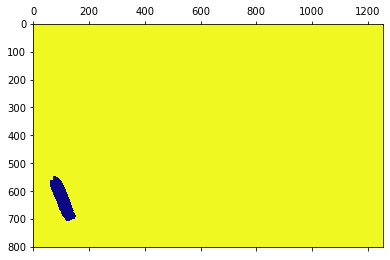

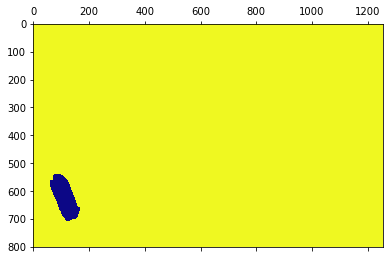

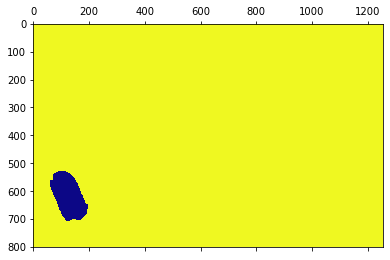

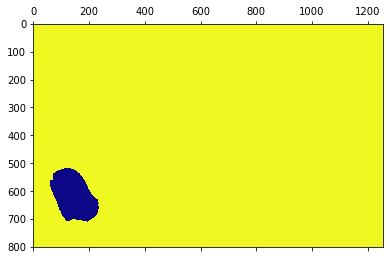

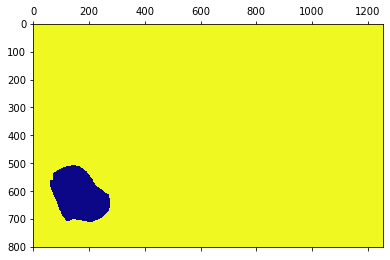

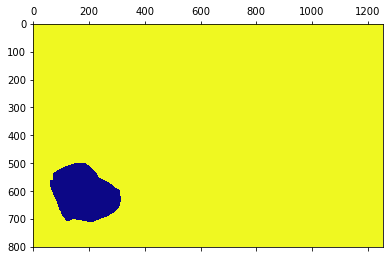

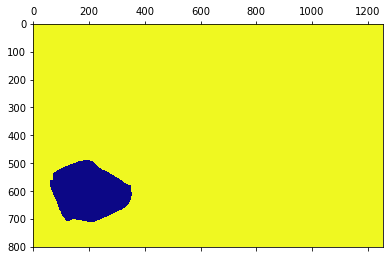

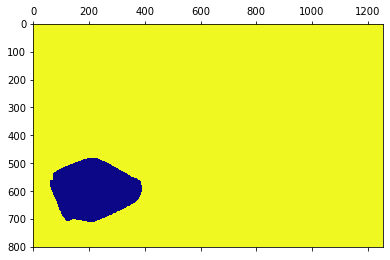

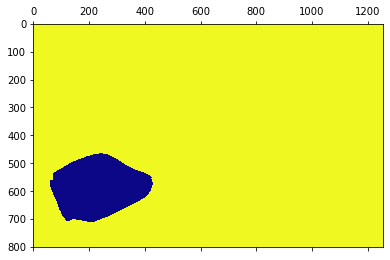

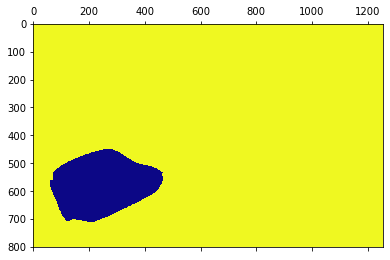

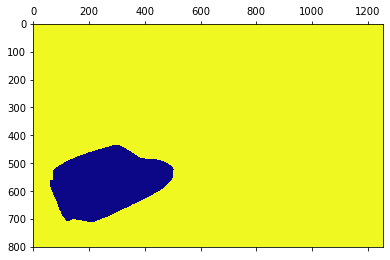

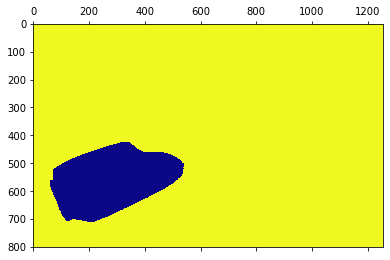

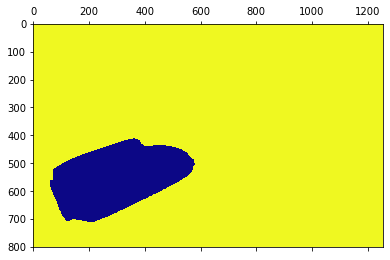

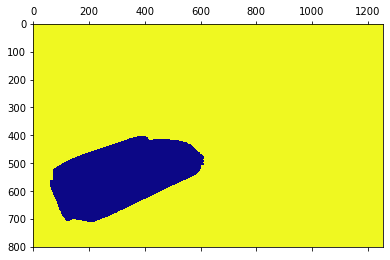

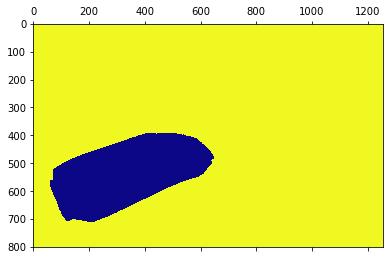

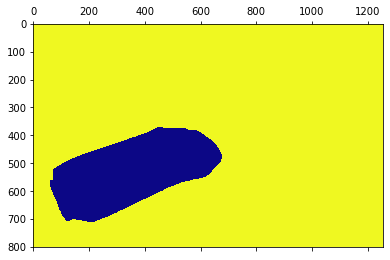

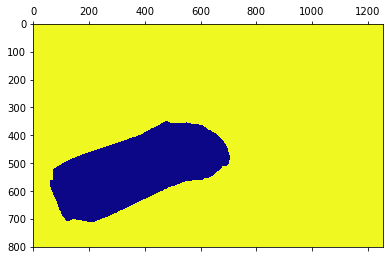

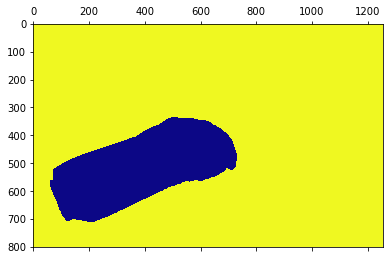

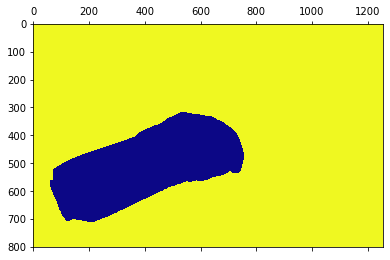

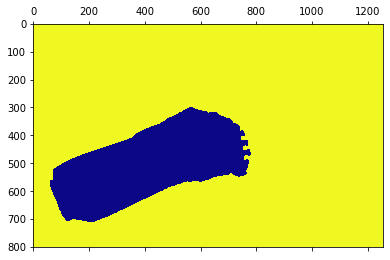

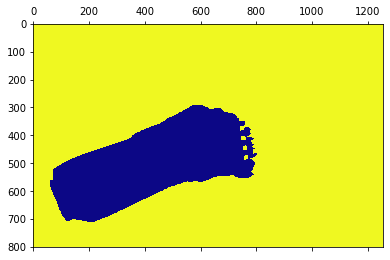

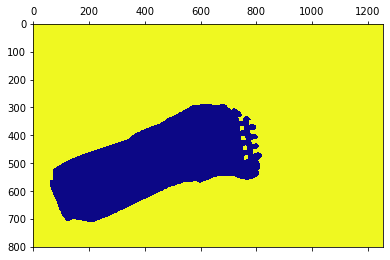

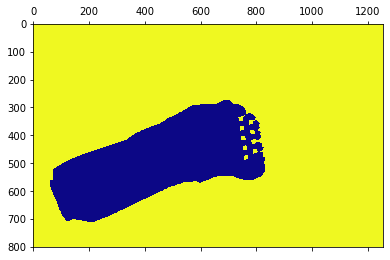

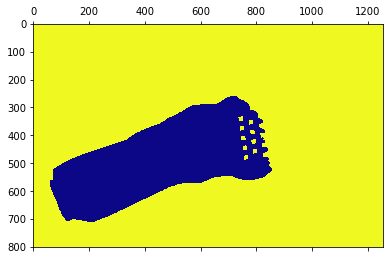

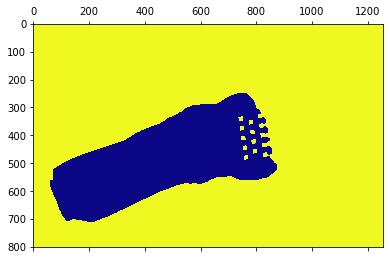

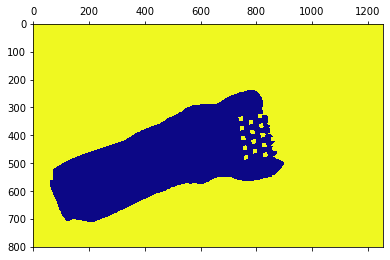

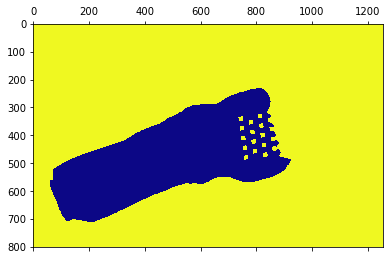

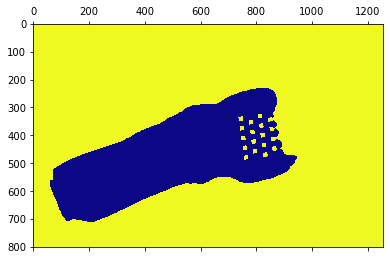

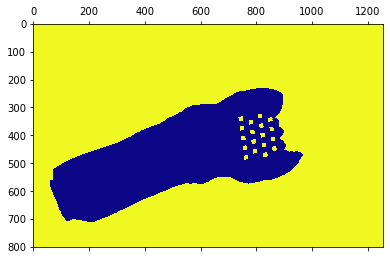

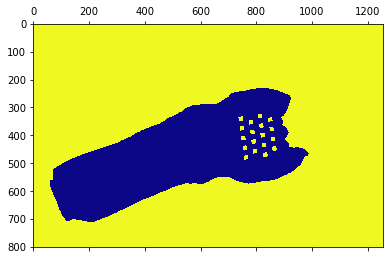

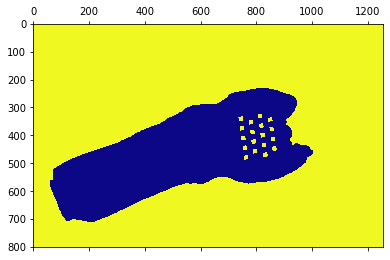

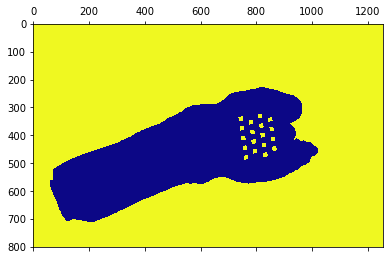

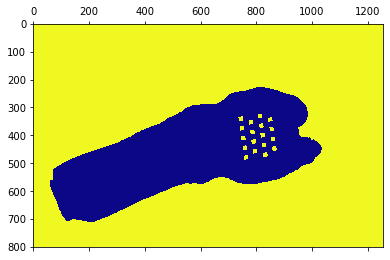

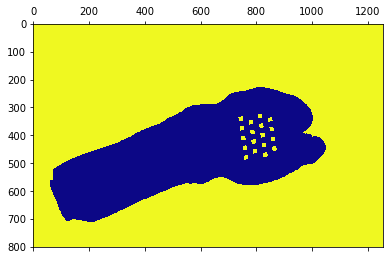

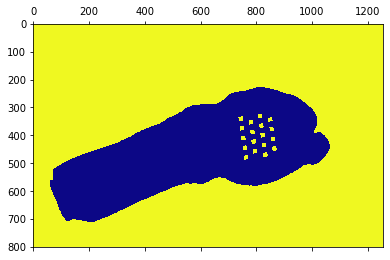

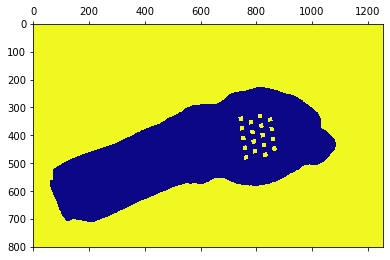

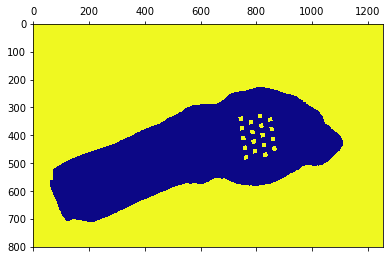

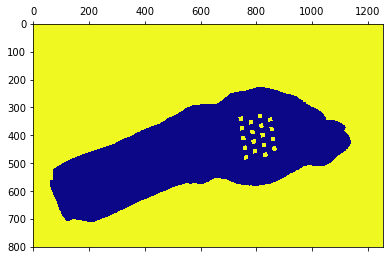

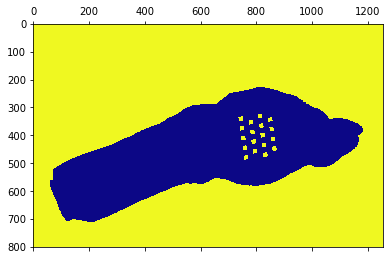

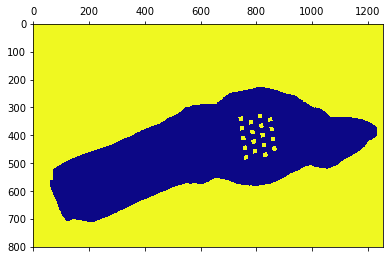

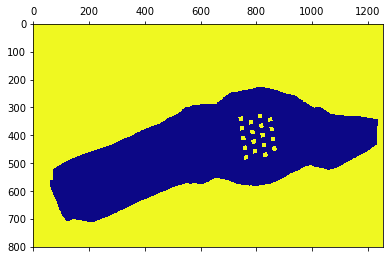

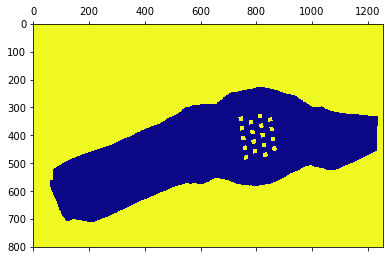

In [ ]:
# WSE animation
data = timesteps[:,:,0,:]

fig = plt.figure()
img = []
for frame in data:
    plt.matshow(frame, cmap="plasma")

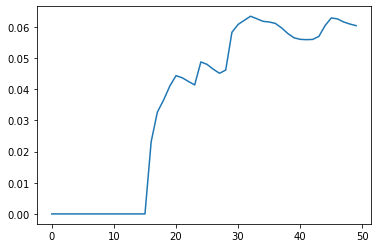

In [105]:
plt.plot(dep_progression)